In [2]:
## Loading data sets
import pandas as pd
data = pd.read_csv('india-news-headlines.csv', error_bad_lines=False)

data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [40]:
## Its a huge data set we are considering a few sample of it
data_text = data[:32971][['headline_text']]

data_text.head()

,headline_text
0,win over cena satisfying but defeating underta...
1,Status quo will not be disturbed at Ayodhya; s...
2,Fissures in Hurriyat over Pak visit
3,America's unwanted heading for India?
4,For bigwigs; it is destination Goa


In [41]:
data_text['index'] = data_text.index

documents = data_text
documents.head()

,headline_text,index
0,win over cena satisfying but defeating underta...,0
1,Status quo will not be disturbed at Ayodhya; s...,1
2,Fissures in Hurriyat over Pak visit,2
3,America's unwanted heading for India?,3
4,For bigwigs; it is destination Goa,4


In [42]:
## Downloading desired Package

import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
import numpy as np
from nltk.stem import PorterStemmer

In [36]:

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
def lemmatize_stemming(text):
    res = WordNetLemmatizer().lemmatize(text, pos='v')
    return PorterStemmer().stem(res)

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :

        if token not in stopwords.words('english') and len(token) > 3:
            
            result.append(lemmatize_stemming(token))
    return result

In [46]:
document_num = 5731
doc_sample = documents[documents['index'] == document_num].values[0][0]

print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['Ceasefire', 'extension', 'was', 'for', 'talks:', 'Padmanabhaiah']


Tokenized and lemmatized document: 
['ceasefir', 'extens', 'talk', 'padmanabhaiah']


In [47]:
processed_docs = documents['headline_text'].map(preprocess)

In [48]:
len(processed_docs)

32971

## Get a BOW Dict from data

In [59]:

dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.items():
    print(k, v)
    count += 1
    if count > 10:
        break

0 bigger
1 cena
2 defeat
3 reign
4 roman
5 satisfi
6 undertak
7 ayodhya
8 disturb
9 say
10 statu


In [60]:
### filter the dict

In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

## Convert document into BOW format by doc2bow

In [61]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [62]:
bow_doc_4310 = bow_corpus[document_num]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 322 ("talk") appears 1 time.
Word 1155 ("ceasefir") appears 1 time.
Word 1671 ("extens") appears 1 time.
Word 5793 ("padmanabhaiah") appears 1 time.


In [ ]:
## TF-IDF on our document set

In [64]:

tfidf = gensim.models.TfidfModel(bow_corpus)

In [65]:
corpus_tfidf = tfidf[bow_corpus]

In [66]:
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.3752660975507376), (1, 0.45334504855773655), (2, 0.3206748311891461), (3, 0.36272986440877925), (4, 0.38321106792478454), (5, 0.3752660975507376), (6, 0.36272986440877925)]


## Running LDA using Bag of Words data

In [87]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics=8, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

In [88]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.011*"student" + 0.009*"life" + 0.008*"year" + 0.006*"make" + 0.006*"kill" + 0.006*"girl" + 0.005*"take" + 0.005*"book" + 0.005*"get" + 0.005*"like"


Topic: 1 
Words: 0.010*"state" + 0.010*"govt" + 0.009*"servic" + 0.008*"plan" + 0.007*"polic" + 0.007*"help" + 0.006*"power" + 0.006*"women" + 0.005*"launch" + 0.005*"school"


Topic: 2 
Words: 0.021*"kill" + 0.011*"hold" + 0.008*"leader" + 0.008*"train" + 0.007*"india" + 0.007*"milit" + 0.007*"cong" + 0.006*"blast" + 0.005*"polic" + 0.005*"terror"


Topic: 3 
Words: 0.011*"take" + 0.011*"govt" + 0.007*"move" + 0.007*"come" + 0.006*"issu" + 0.006*"support" + 0.005*"india" + 0.005*"notic" + 0.005*"free" + 0.005*"power"


Topic: 4 
Words: 0.008*"drought" + 0.007*"water" + 0.007*"relief" + 0.007*"flood" + 0.006*"ask" + 0.006*"govt" + 0.006*"report" + 0.006*"seek" + 0.005*"congress" + 0.005*"fund"


Topic: 5 
Words: 0.017*"govt" + 0.010*"india" + 0.007*"offici" + 0.007*"strike" + 0.007*"arrest" + 0.006*"polic" + 0.006*"leav

## Topic coherence

In [89]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5102112554985643


#### lower the coherence better the result of topic modelling

In [90]:

from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -12.340827812533734


## find the optimal number of topics

In [72]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [73]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,/
                                                        corpus=bow_corpus, texts=processed_docs,/
                                                        start=2, limit=40, step=6)

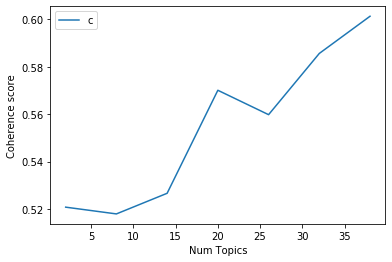

In [74]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Running LDA using TF-IDF

In [75]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=8, 
                                             id2word = dictionary, 
                                             passes = 2, 
                                             workers=4)

In [76]:

for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.004*"world" + 0.003*"stay" + 0.003*"india" + 0.003*"time" + 0.003*"govt" + 0.003*"meet" + 0.003*"secur" + 0.003*"women" + 0.002*"sacr" + 0.002*"go"


Topic: 1 Word: 0.004*"india" + 0.004*"govt" + 0.004*"polic" + 0.004*"case" + 0.004*"call" + 0.003*"help" + 0.003*"fund" + 0.003*"leader" + 0.003*"student" + 0.003*"colleg"


Topic: 2 Word: 0.006*"back" + 0.004*"govt" + 0.003*"question" + 0.003*"centr" + 0.003*"india" + 0.003*"kill" + 0.003*"lade" + 0.003*"resign" + 0.002*"book" + 0.002*"rule"


Topic: 3 Word: 0.004*"road" + 0.003*"kashmir" + 0.003*"kill" + 0.003*"need" + 0.003*"good" + 0.003*"make" + 0.002*"india" + 0.002*"today" + 0.002*"indian" + 0.002*"chief"


Topic: 4 Word: 0.004*"take" + 0.004*"govt" + 0.004*"india" + 0.004*"meet" + 0.004*"fire" + 0.004*"state" + 0.003*"right" + 0.003*"hike" + 0.003*"power" + 0.003*"miss"


Topic: 5 Word: 0.005*"drought" + 0.004*"minist" + 0.004*"govt" + 0.004*"terror" + 0.003*"power" + 0.003*"poll" + 0.003*"love" + 0.003*"move" + 0

In [77]:
from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.5594164659089098


## classifying sample document using LDA Bag of Words model

In [78]:


processed_docs[document_num]

['ceasefir', 'extens', 'talk', 'padmanabhaiah']

In [79]:
for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))


Score: 0.541571319103241	 Topic: 0.016*"govt" + 0.010*"board" + 0.009*"stay" + 0.008*"delhi" + 0.008*"mumbai"

Score: 0.29809123277664185	 Topic: 0.013*"citi" + 0.011*"meet" + 0.010*"order" + 0.009*"take" + 0.007*"speak"

Score: 0.020057765766978264	 Topic: 0.015*"time" + 0.012*"govt" + 0.011*"student" + 0.011*"teacher" + 0.011*"case"

Score: 0.020048171281814575	 Topic: 0.011*"offici" + 0.010*"look" + 0.009*"keep" + 0.008*"action" + 0.008*"like"

Score: 0.020044030621647835	 Topic: 0.029*"india" + 0.009*"world" + 0.007*"free" + 0.007*"scam" + 0.007*"tourism"

Score: 0.020042436197400093	 Topic: 0.016*"kill" + 0.014*"arrest" + 0.013*"polic" + 0.010*"milit" + 0.010*"govt"

Score: 0.02003842033445835	 Topic: 0.017*"indian" + 0.009*"fall" + 0.009*"make" + 0.009*"anti" + 0.009*"state"

Score: 0.02003667689859867	 Topic: 0.013*"life" + 0.008*"want" + 0.008*"file" + 0.007*"villag" + 0.007*"fight"

Score: 0.020036563277244568	 Topic: 0.012*"death" + 0.007*"servic" + 0.007*"come" + 0.006*"gov

In [80]:

lda_model[bow_corpus[document_num]]

[(0, 0.02004869),
 (1, 0.020046176),
 (2, 0.31128255),
 (3, 0.36267686),
 (4, 0.020045634),
 (5, 0.020047462),
 (6, 0.020049449),
 (7, 0.0200501),
 (8, 0.18570548),
 (9, 0.020047596)]

In [81]:

sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(2, 0.5411006),
 (3, 0.29856166),
 (8, 0.02005783),
 (7, 0.020048218),
 (0, 0.020044072),
 (6, 0.020042468),
 (5, 0.02003845),
 (1, 0.020036705),
 (9, 0.020036584),
 (4, 0.020033428)]

In [82]:

lda_model.print_topic(index, 8)

'0.015*"cong" + 0.013*"award" + 0.010*"citi" + 0.010*"govt" + 0.008*"play" + 0.008*"congress" + 0.008*"attack" + 0.008*"secur"'

## classifying sample document using LDA TF-IDF model

In [83]:
for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))


Score: 0.5615081191062927	 Topic: 0.005*"drought" + 0.004*"minist" + 0.004*"govt" + 0.004*"terror" + 0.003*"power"

Score: 0.2881168723106384	 Topic: 0.004*"take" + 0.004*"govt" + 0.004*"india" + 0.004*"meet" + 0.004*"fire"

Score: 0.02508978173136711	 Topic: 0.004*"india" + 0.004*"govt" + 0.004*"polic" + 0.004*"case" + 0.004*"call"

Score: 0.02508961781859398	 Topic: 0.006*"back" + 0.004*"govt" + 0.003*"question" + 0.003*"centr" + 0.003*"india"

Score: 0.02506328746676445	 Topic: 0.004*"road" + 0.003*"kashmir" + 0.003*"kill" + 0.003*"need" + 0.003*"good"

Score: 0.025055360049009323	 Topic: 0.004*"continu" + 0.003*"govt" + 0.003*"sept" + 0.003*"make" + 0.003*"girl"

Score: 0.02503972128033638	 Topic: 0.004*"world" + 0.003*"stay" + 0.003*"india" + 0.003*"time" + 0.003*"govt"

Score: 0.025037208572030067	 Topic: 0.007*"hold" + 0.006*"kill" + 0.005*"polic" + 0.003*"offic" + 0.003*"strike"


## Testing model on unseen document

In [86]:
unseen_document = "my name is prajwal."

bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: tup[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5499895811080933	 Topic: 0.013*"life" + 0.008*"want" + 0.008*"file" + 0.007*"villag" + 0.007*"fight"
Score: 0.05000144615769386	 Topic: 0.012*"death" + 0.007*"servic" + 0.007*"come" + 0.006*"govt" + 0.006*"continu"
Score: 0.05000125244259834	 Topic: 0.015*"cong" + 0.013*"award" + 0.010*"citi" + 0.010*"govt" + 0.008*"play"
Score: 0.05000114068388939	 Topic: 0.011*"offici" + 0.010*"look" + 0.009*"keep" + 0.008*"action" + 0.008*"like"
Score: 0.0500011146068573	 Topic: 0.016*"govt" + 0.010*"board" + 0.009*"stay" + 0.008*"delhi" + 0.008*"mumbai"
Score: 0.0500011146068573	 Topic: 0.016*"kill" + 0.014*"arrest" + 0.013*"polic" + 0.010*"milit" + 0.010*"govt"
Score: 0.050001103430986404	 Topic: 0.013*"citi" + 0.011*"meet" + 0.010*"order" + 0.009*"take" + 0.007*"speak"
Score: 0.05000109598040581	 Topic: 0.029*"india" + 0.009*"world" + 0.007*"free" + 0.007*"scam" + 0.007*"tourism"
Score: 0.05000109598040581	 Topic: 0.017*"indian" + 0.009*"fall" + 0.009*"make" + 0.009*"anti" + 0.009*"state

## WE need to train on large data for more better accuracy due to System constraints it's done only one 15% of total size of data